In [1]:
import numpy as np
%matplotlib inline
import tensorflow as tf
from tensorflow import keras

# Let's work on classifying fashion MNIST

In [2]:
# load the dataset (keras offers a functionality for this)
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = (fashion_mnist.load_data())

# inspect the shapes
# How many data instances are there in my train set? 
print(X_train_full.shape)
print(y_train_full.shape)
print(X_test.shape)
print(y_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Sneaker


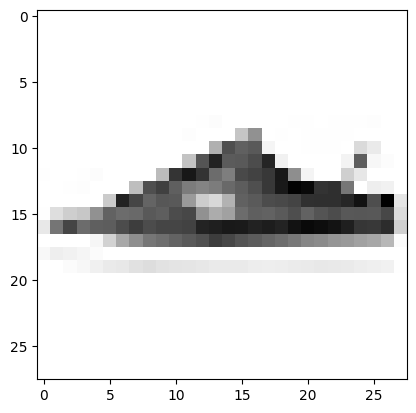

In [29]:
# visualize random image with label
import matplotlib.pyplot as plt
import random
index = random.randint(0,60000)
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
im1 = X_train_full[index]
label1 = y_train_full[index]
print(class_names[label1])
plt.imshow(im1, cmap="Greys")


Split away a validation set with 5000 instances from the full training set 


In [30]:
# get a validation set of size 5000
# use the train-test split of scikit-learn for that matter
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=5000, random_state=42)

print(X_train.shape)
print(X_val.shape)

(55000, 28, 28)
(5000, 28, 28)


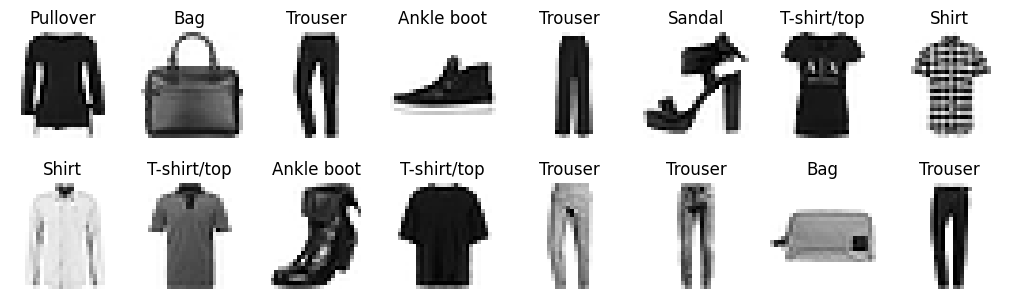

In [31]:
# Data vizualization
n_rows = 2
n_cols = 8
plt.figure(figsize=(n_cols*1.6, n_rows * 1.8))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])

plt.show()

# Random Forest

In [32]:
# let's train a random forest classifier on the data to see what accuracies we'll get 

# First reshape this into one dimensional vectors
vector_size = X_train.shape[1]*X_train.shape[2]
X_train_vectors = X_train.reshape((X_train.shape[0], vector_size))
X_val_vectors = X_val.reshape((X_val.shape[0], vector_size))
X_test_vectors = X_test.reshape((X_test.shape[0], vector_size))

print(X_train_vectors.shape)

(55000, 784)


In [34]:
from sklearn.ensemble import RandomForestClassifier
# TODO 
# Assign correct splits from the cell above
train_features = X_train_vectors
train_labels = y_train

validation_features = X_val_vectors
validation_labels = y_val

clf = RandomForestClassifier(random_state=0)
clf.fit(train_features, train_labels)


# measure train score and val score
train_score = clf.score(train_features, train_labels)
val_score = clf.score(validation_features, validation_labels)

print("Train score: ", train_score)
print("Val score: ", val_score)

Train score:  1.0
Val score:  0.8798


Predicted class:  Pullover
Actual class:  Pullover


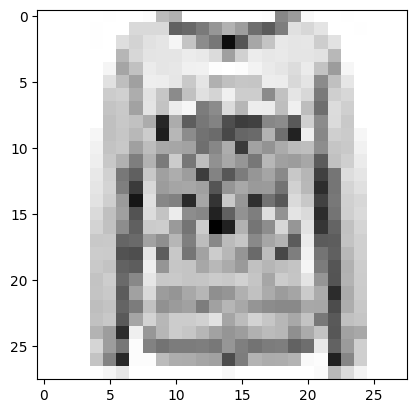

In [57]:
# draw a random image from the val set and show the model's prediction
import numpy as np
image_index = np.random.randint(len(X_val_vectors))
rand_image_vec = X_val_vectors[image_index]
rand_image = rand_image_vec.reshape((28,28))
plt.imshow(rand_image, cmap="Greys")

[predicted_class] = clf.predict(rand_image_vec.reshape(1,-1))
actual_class = y_val[image_index]

print("Predicted class: ", class_names[predicted_class])
print("Actual class: ", class_names[actual_class])

Now, let's train a logistic classifier


In [58]:
from sklearn.linear_model import LogisticRegression
# TODO use correct data splits
train_features = X_train_vectors
train_labels = y_train

validation_features = X_val_vectors
validation_labels = y_val

clf = LogisticRegression(random_state=0)
X_train_norm = train_features / 255.0
X_val_norm = validation_features / 255.0

clf.fit(X_train_norm, y_train)

# measure train score and val score
train_score = clf.score(train_features, train_labels)
val_score = clf.score(validation_features, validation_labels)

print("Train score: ", train_score)
print("Val score: ", val_score)

c:\Users\bacco\Desktop\Master\SS2023\AI_NN\LabexerciseNotebook\labex\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train score:  0.7481454545454546
Val score:  0.737


--> way worse

# Feedforward Neural network in Keras
Now it's time to shine for the neural network powered by keras

In [60]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(300, input_shape=[28*28], activation="relu"))
# TODO add one more layer with 100 units and relu activation
model.add(keras.layers.Dense(100,input_shape=[300,300],activation = "relu"))
# TODO add the output layer with number_of_classes units and softmax activation
model.add(keras.layers.Dense(16,input_shape=[100,100],activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam",metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 300)               235500    
                                                                 
 dense_3 (Dense)             (None, 100)               30100     
                                                                 
 dense_4 (Dense)             (None, 16)                1616      
                                                                 
Total params: 267,216
Trainable params: 267,216
Non-trainable params: 0
_________________________________________________________________


In [61]:
# let's inspect the weights of a single hidden layer, say the first
h1 = model.layers[0]
print(h1)
weights, biases = h1.get_weights()
print(weights.shape)
print(biases.shape)

(784, 300)
(300,)


In [62]:
history = model.fit(X_train_norm, y_train, epochs=30, validation_data=(X_val_norm, y_val))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4917 - accuracy: 0.8243 - val_loss: 0.3933 - val_accuracy: 0.8616
Epoch 2/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3626 - accuracy: 0.8665 - val_loss: 0.4037 - val_accuracy: 0.8560
Epoch 3/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3247 - accuracy: 0.8805 - val_loss: 0.3542 - val_accuracy: 0.8786
Epoch 4/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3020 - accuracy: 0.8886 - val_loss: 0.3540 - val_accuracy: 0.8694
Epoch 5/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2845 - accuracy: 0.8941 - val_loss: 0.3328 - val_accuracy: 0.8796
Epoch 6/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2668 - accuracy: 0.8991 - val_loss: 0.3479 - val_accuracy: 0.8804
Epoch 7/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2549 - accuracy: 0.9035 - val_loss: 0.3414 - val_accuracy:

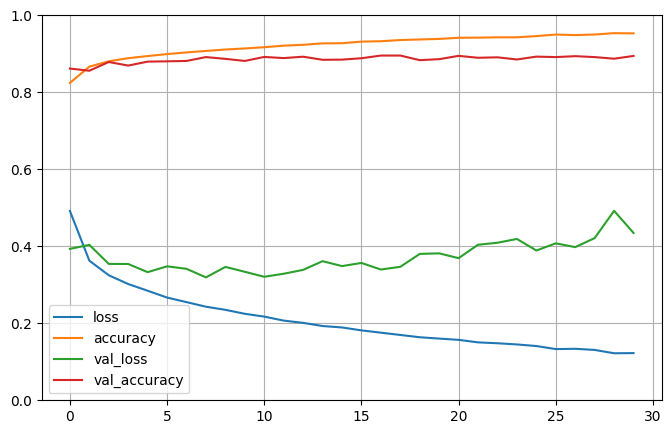

In [63]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.savefig("keras_learning_curves_plot.png")
plt.show()